### Step 1: Import Libraries and csv files

In [1]:
# Import the required libraries
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the CSV file into a Pandas DataFrame
car_prices_df = pd.read_csv(Path("Resources/car_prices.csv"))
#car_prices_df.drop(columns=['vin','saledate'], axis=1)

# Review the DataFrame
car_prices_df.head()


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [3]:
# Check for Null Values
car_prices_df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [4]:
car_prices_df.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


### Step 2: Exploratory Data Analysis

In [5]:
# Separate the data into target and features

# Separate the y variable, the target
y = car_prices_df["sellingprice"]

# Separate the X variable, the features
X = car_prices_df.drop(columns="sellingprice")

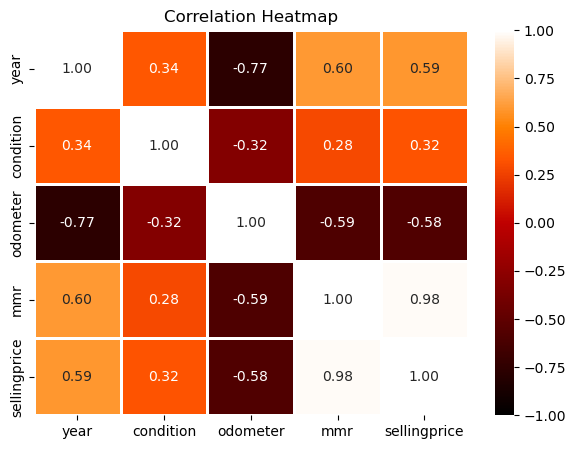

In [6]:
# Visualization of numerical data
plt.figure(figsize=(7, 5))
sns.heatmap(car_prices_df.corr(), annot=True, fmt='.2f', cmap='gist_heat', linewidths=1, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')

plt.show()

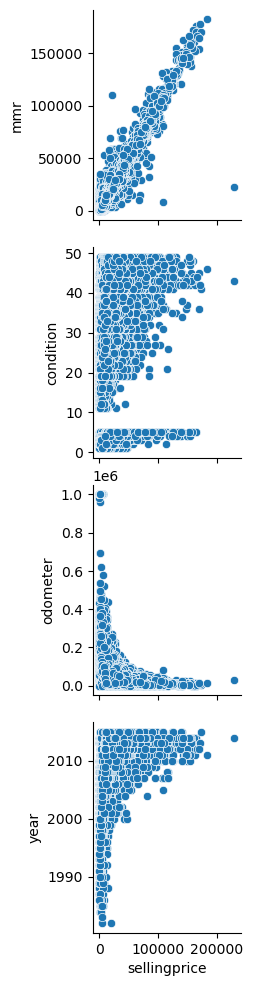

In [7]:
# Create a pairplot using Seaborn
sns.pairplot(car_prices_df, x_vars=["sellingprice"], y_vars=["mmr", "condition", "odometer", "year"])

# Display the pairplot
plt.show()

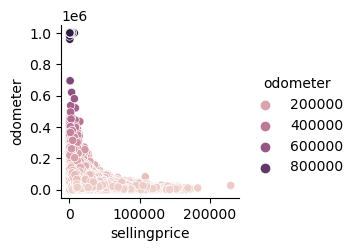

In [8]:
sns.pairplot(car_prices_df, x_vars=["sellingprice"], y_vars=["odometer"], hue="odometer", markers="o")
#Display the pairplot
plt.show()

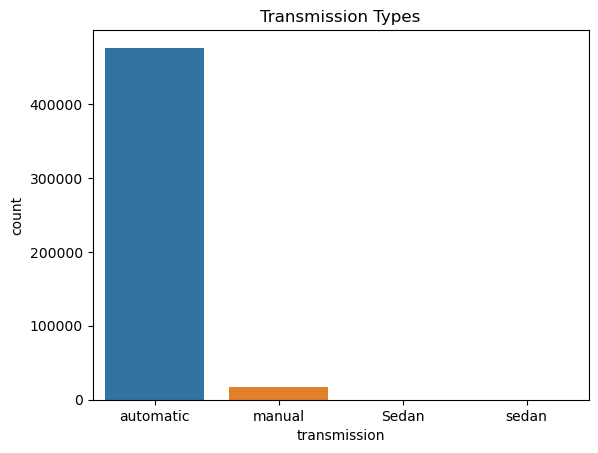

In [9]:
sns.countplot (x="transmission", data=car_prices_df)
plt.title("Transmission Types")
plt.show;

In [10]:
car_prices_df["model"].value_counts()

Altima        19349
F-150         14479
Fusion        12946
Camry         12545
Escape        11861
              ...  
rrs               1
golf              1
g500              1
tahoe             1
458 Italia        1
Name: model, Length: 973, dtype: int64

In [14]:
make = car_prices_df["make"]
model = car_prices_df["model"]
price = car_prices_df ["sellingprice"]

In [15]:
#fig, axes = plt.subplot(1,2, fig size=(26,20), sharey=True)
#fig.suptitle("Visualizing categorical data columns")
#sns.barplot(x=make, y=price, ax = axes[0])
#sns.barplot(x=model, y=price, ax=axes[1])



ValueError: Could not interpret input 'model'

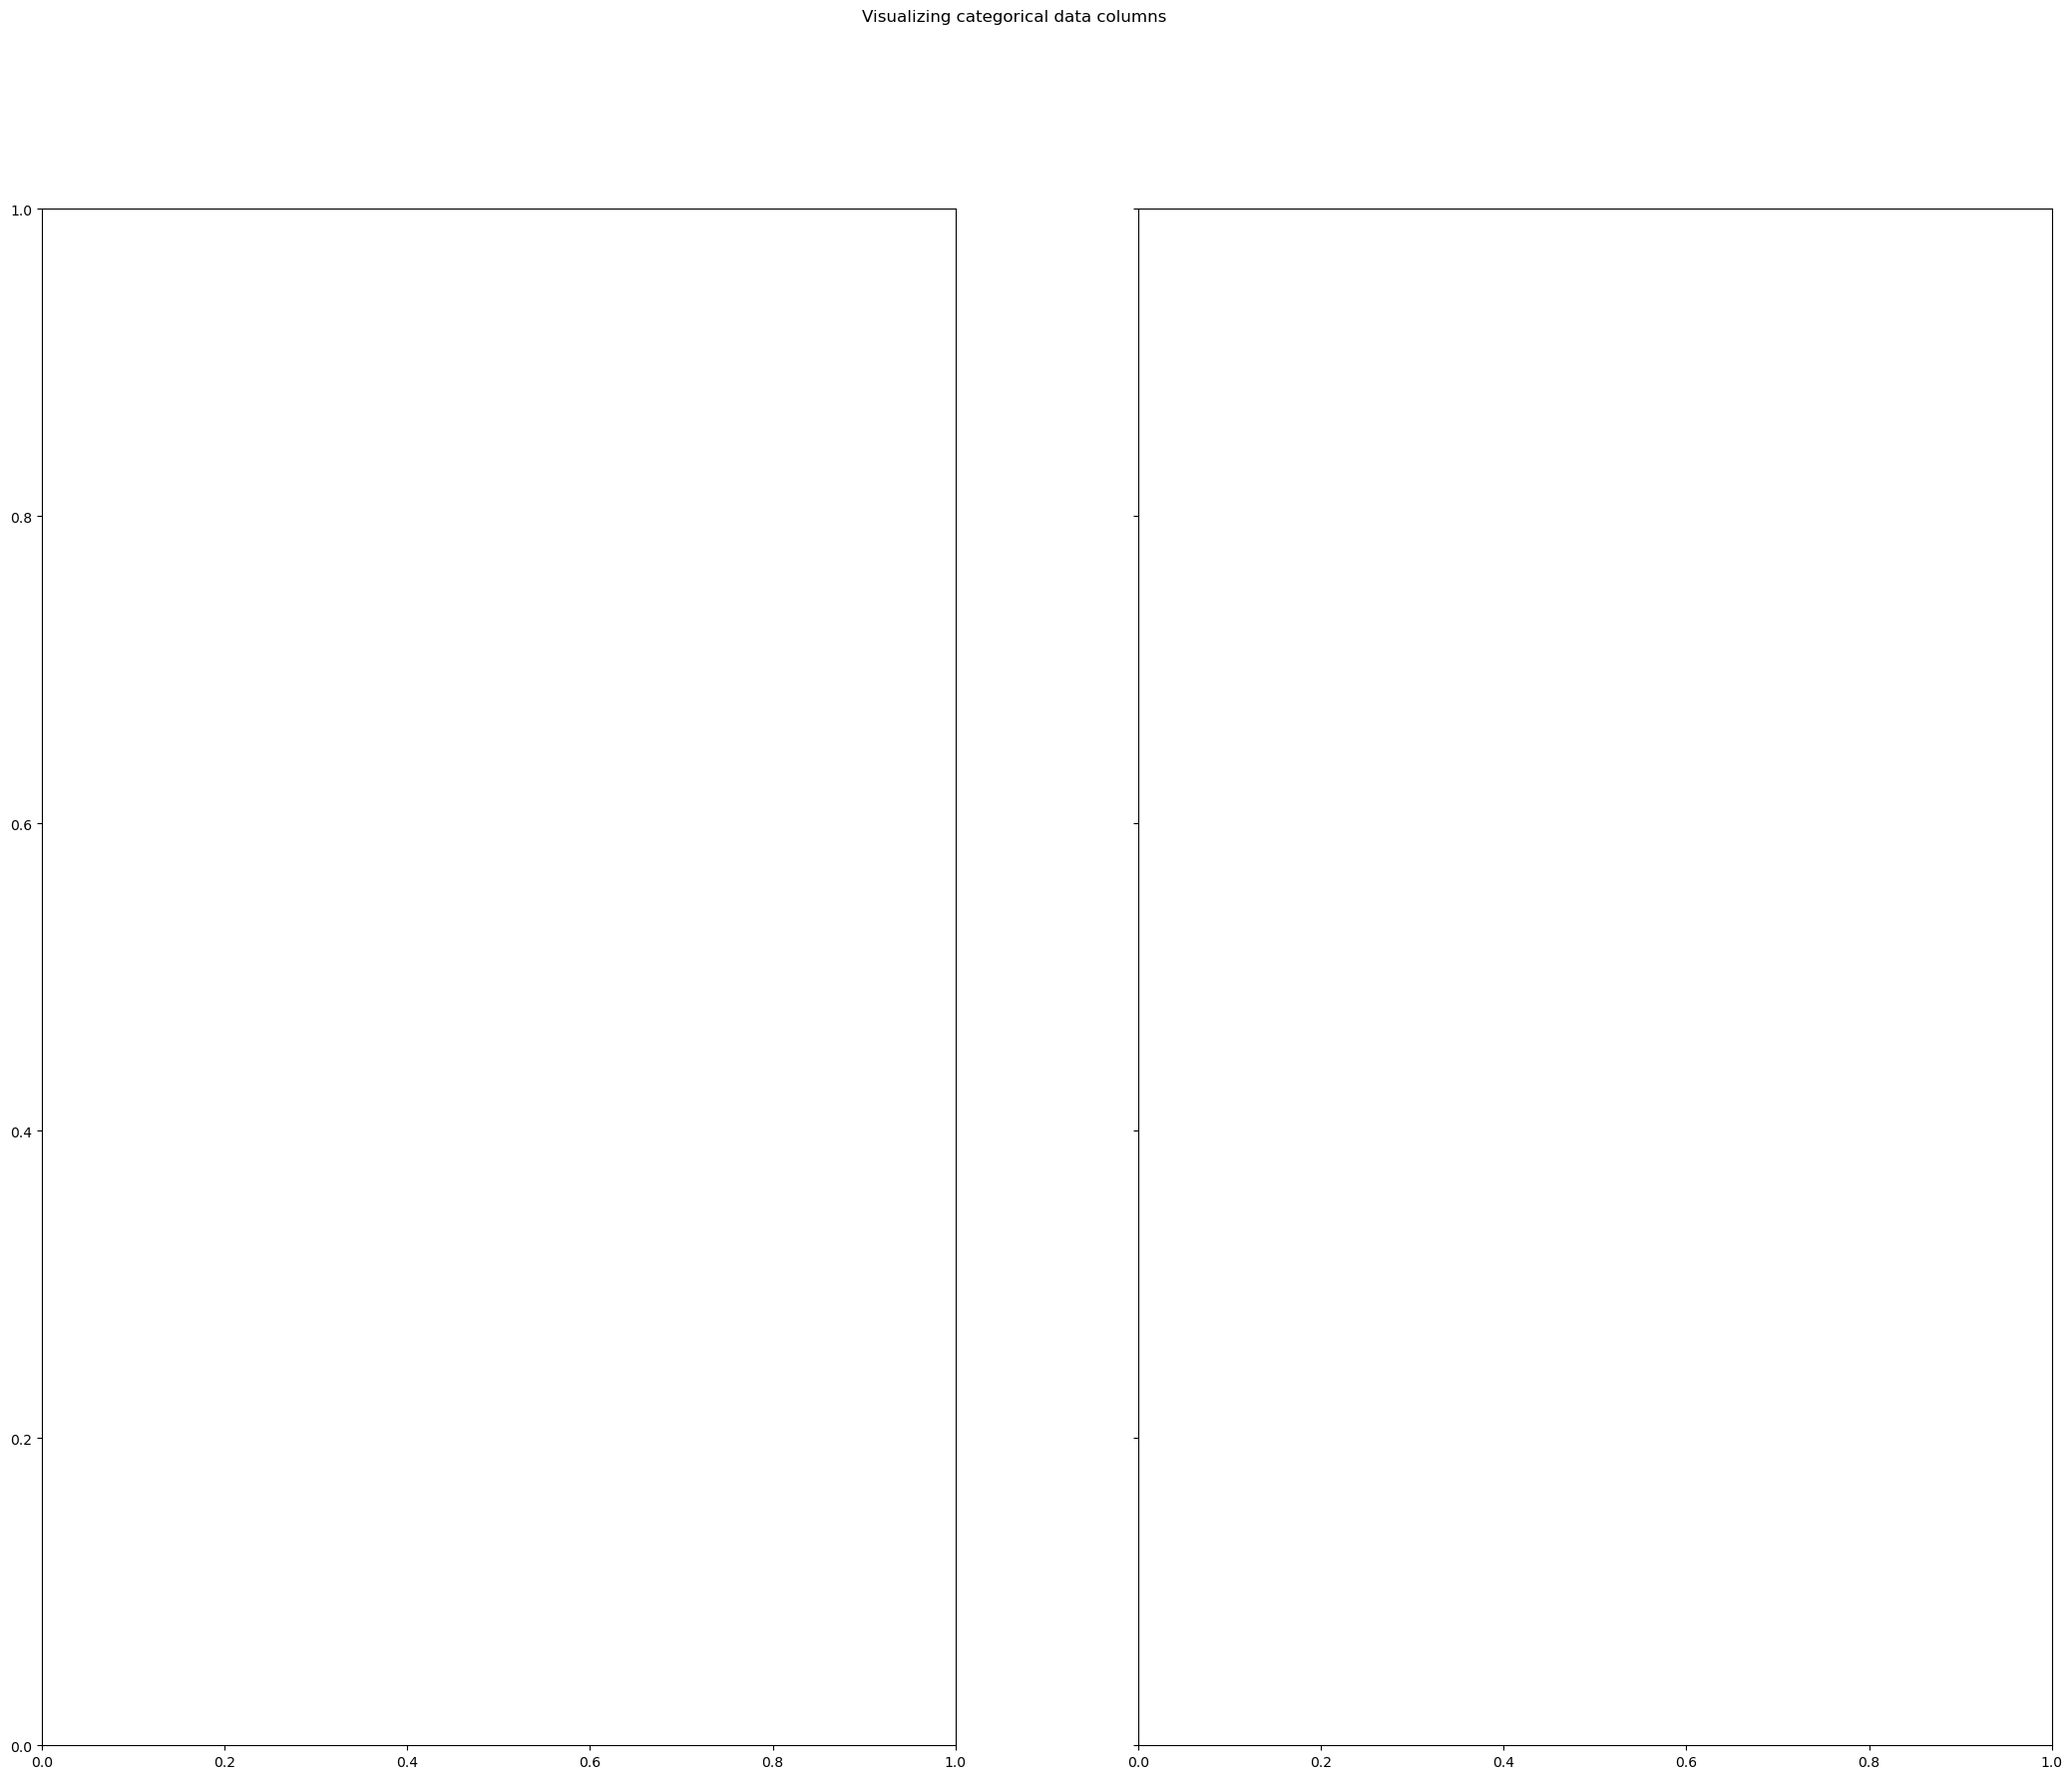

In [18]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(26, 20), sharey=True)
fig.suptitle("Visualizing categorical data columns")

# Assuming 'make', 'model', and 'price' are your column names
sns.barplot(x='make', y='price', ax=axes[0])
sns.barplot(x='model', y='price', ax=axes[1])

# Show the plots
plt.show()

In [ ]:
# Create a pairplot using the variables "make" using Seaborn
sns.pairplot(car_prices_df, x_vars=["sellingprice"], y_vars=["make"], hue="make", markers="o")
#Display the pairplot
plt.show()

#(need to fix plot for easir visibility)

In [ ]:
# Create a pairplot using the variables "make" and "model" using Seaborn (might not use this one)
sns.pairplot(car_prices_df, x_vars=["sellingprice"], y_vars=["model"])
#Display the pairplot
plt.show()

In [ ]:
g = sns.PairGrid(car_prices_df, y_vars=["sellingprice"], x_vars=["mmr", "odometer"], height=4)
g.map(sns.regplot, color=".3")
g.set(ylim=(-1, 11), yticks=[0, 5, 10])

plt.show()

In [ ]:
# Create a pairplot using the variables "interior" and "color" using Seaborn
sns.pairplot(car_prices_df, x_vars=["sellingprice"], y_vars=["color", "interior"], hue="color", markers="o")

#Display the pairplot
plt.show()

In [ ]:
g = sns.PairGrid(car_prices_df, hue="sellingprice")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

### Step 3: Preprocessing the Data